# TP -- Regression Linéaire -- sklearn + Regularisation

In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.model_selection
import sklearn.linear_model
import sklearn.preprocessing

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.ion()

### Remarque: les parties sont indépendantes

# Chargement des données, vocabulaire

Puisqu'on n'a jamais fait de régression linéaire en TD, et qu'on en a parlé, mais assez rapidement, en cours, on commence par une illustration de ce que peut faire la régression linéaire, sur un cas concret:

C'est le fameux *boston house market* data set: 

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

Mis sur Kaggle plus récemment:
https://www.kaggle.com/vikrishnan/boston-house-prices/ 

On s'inspire assez amplement de la solution de l'autrice (Kaggle) du dataset, au moins pour ce qui est du chargement des données:
https://www.kaggle.com/vikrishnan/house-sales-price-using-regression

En gros, on a des données sur différents quartiers de Boston, et pour chaque quartier, on a le prix médian des maisons (ou appartements). On cherche à comprendre comment certains facteurs du voisinage déterminent le prix des maisons d'un quartier. Ou bien plus simplement, dans le cadre de ce DM, on se contente de tenter de prédire le prix des maisons en fonction des données fournies en entrée.

Comme d'habitude, on a $N$ points dans l'ensemble d'entraînement, chaque point de donnée est en dimension $D$, et les labels à prédire sont des valeurs continues, $y_n\in \mathbb{R}$.

Les attributs sont décrits ainsi à l'origine:

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per USD10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town
    13. LSTAT    percentage lower status of the population
    14. MEDV     Median value of owner-occupied homes in 1000 USD
    

## Partie 1.0 - petite démo de statistiques descriptives

Ici, vous n'avez rien à faire, juste à lire ce qu'on vous présente (ce sera bien pratique pour les projets!)

In [19]:
# chargement des données
filename = "TP-RegressionLineaire-data-partie1-housing.csv"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv(filename, delim_whitespace=True, names=names)
dataset.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,6.32e-03,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296.0,15.3,396.90,4.98,24.0
1,2.73e-02,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242.0,17.8,396.90,9.14,21.6
2,2.73e-02,0.0,7.07,0,0.47,7.18,61.1,4.97,2,242.0,17.8,392.83,4.03,34.7
3,3.24e-02,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222.0,18.7,394.63,2.94,33.4


# Vocabulaire

citer le nom de deux features.

quel est le nombre de points de données?

quelle est la dimension des données ? Quel est le nombre de features ?

Quel va etre le type de tache ? (supervisé ou non ? Classification ou Regression ou ... ?)

In [12]:
## les colonnes (sauf la dernière) correspondent aux variables explicatives du prix (features)
features = dataset.columns[:-1]

# la derniere colonne, MEDV, correspond à la valeur médiane (Median Value) des maisons dans un quartier
label = dataset.columns[-1]

In [34]:
features, label

(Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT'],
       dtype='object'),
 'MEDV')

In [4]:
print(dataset.shape)

(506, 14)


In [13]:
## on convertit les tableaux pandas en tabeaux numpy
X = dataset[features].values
Y = dataset[label].values

In [31]:
X.shape, Y.shape

((506, 13), (506,))

## Fit par regression lineaire (brutale)

Ici on n'est pas très fin, mais bon, c'est pour avoir un exemple concret:

In [36]:
monModele = sklearn.linear_model.LinearRegression()

In [39]:
monModele.fit(X, Y) ## attention, ne faites pas ça chez vous ! C'est tres dangereux d'entrainer sur toutes les données ! On le fait ici juste car c'est le premier cours !


train error 21.894831181729202


In [53]:
monModele.coef_, monModele.intercept_

(array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
        -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
         3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]),
 36.45948838509015)

In [52]:
Y_train_pred = monModele.predict(X)
print("train error", sklearn.metrics.mean_squared_error(Y_train_pred, Y))

train error 21.894831181729202


In [51]:
# on peut le calculer à la main :
Y_train_pred = monModele.intercept_ + X @ monModele.coef_ 
print("train error", sklearn.metrics.mean_squared_error(Y_train_pred, Y))

train error 21.894831181729202


## Représentation du résultat (y prédit) vs. la vérité terrain


In [54]:
xmin= min(Y.min(), Y_train_pred.min() )-1
xmax= max(Y.max(), Y_train_pred.max() )+1

/home/flandes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


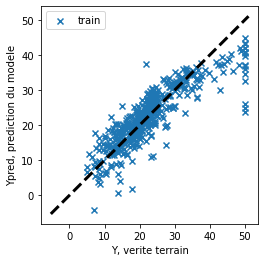

In [43]:
fig = plt.figure(1)
plt.scatter(Y, Y_train_pred, marker='x', label='train')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='k', ls='--') ## droite separatrice d'equation x2=x1

# ?labe -> xlabel ou ylabel: a vous de voir
plt.xlabel('Y, verite terrain')
plt.ylabel('Ypred, prediction du modele') 
plt.legend()
ax = fig.add_subplot(111)
ax.set_aspect('equal') # on veut une figure carrée et pas allongée.
# plt.xlim([xmin,xmax])
# plt.ylim([xmin,xmax])

# Statisiques descriptives

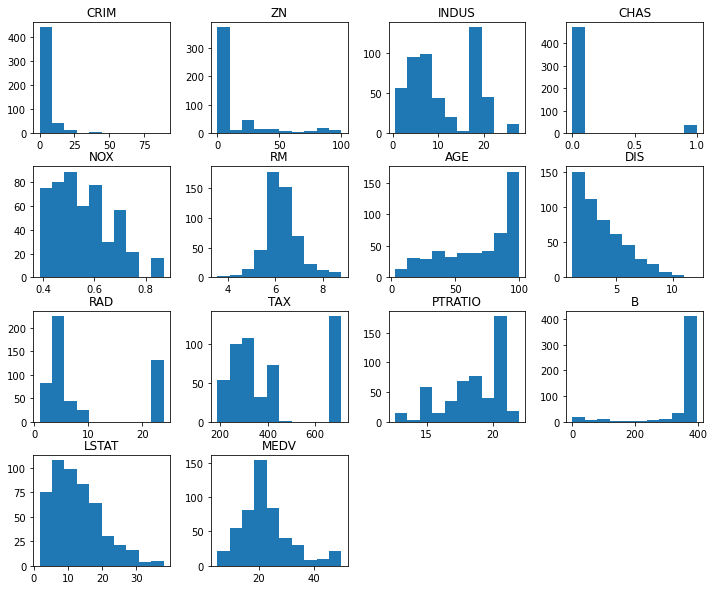

In [7]:
# Data visualizations

# histograms
dataset.hist(bins=10,figsize=(12,10),grid=False);

In [8]:
# on calcule les corréaltions entre colonnes (coeff. de correlation de Pearson)
pd.set_option('precision', 2)
corre = dataset.corr(method='pearson')
corre

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-5.59e-02,0.42,-0.22,0.35,-0.38,6.26e-01,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


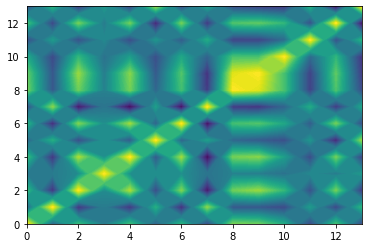

In [27]:
plt.contourf(corre, antialiased=False,levels=100)